<h1 align = "center"><font color = "red">Importing necessary libraries</font></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from scipy.stats import zscore, boxcox

import statsmodels.formula.api as smf

from collections import Counter

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV



from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import pickle

import warnings
warnings.filterwarnings('ignore')

<h1 align = "center"><font color = "red">Getting the Data</font></h1>

In [2]:
#storing the file path/ url path in a variable
train = "https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv"
test = "https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv"

#make dataframe of the data
train0 = pd.read_csv(train)
test0 = pd.read_csv(test)

In [3]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', 50)

<h1 align="center"><font color = "red">Data Preprocessing, Data Visualization & EDA</font> </h1>

<h1 align = "center"><font color = "magenta"><b>For Train Dataset</b></font></h1>

In [4]:
train0.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
print(train0.shape)

(8523, 12)


#### Observation:
1. The data set has 8523 rows of data & 11 feature Columns & 1 target variable
2. Some feature are categorical in nature.
3. There is presense of Null values in data.
4. There is missing data in item weight, outlet size which need to impute with appropriate method.

In [6]:
test0.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
print(test0.shape)

(5681, 11)


#### Observation:
1. The test data set has 5681 rows of data & 11 feature Columns.
2. Some feature are categorical in nature.
3. There is presense of Null values in data.
4. There is missing data in item weight, outlet size.

In [8]:
train0.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
train0.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [10]:
test0.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [11]:
test0.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

## Checking missing data & duplicates in train set

<AxesSubplot:>

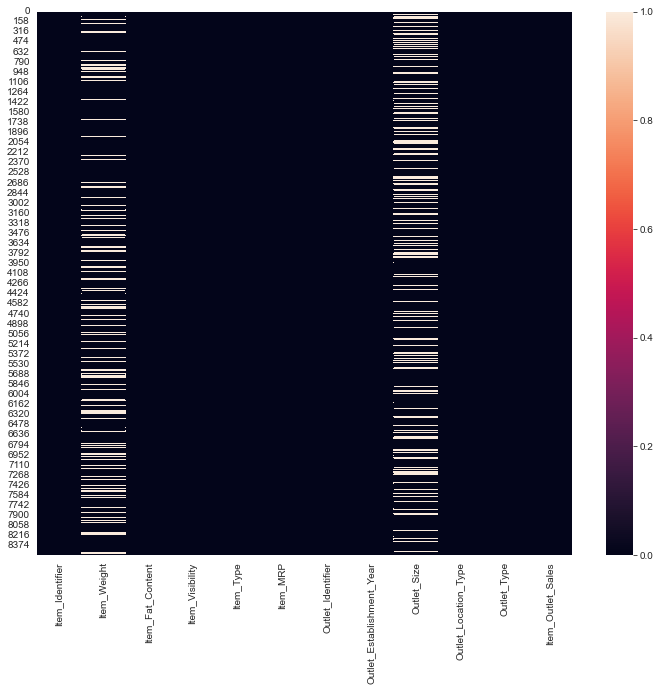

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(train0.isnull())

In [13]:
missing_values = train0.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(train0))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                           Missing Values  % Missing data
Outlet_Size                          2410       28.276428
Item_Weight                          1463       17.165317
Item_Outlet_Sales                       0        0.000000
Outlet_Type                             0        0.000000
Outlet_Location_Type                    0        0.000000
Outlet_Establishment_Year               0        0.000000
Outlet_Identifier                       0        0.000000
Item_MRP                                0        0.000000
Item_Type                               0        0.000000
Item_Visibility                         0        0.000000
Item_Fat_Content                        0        0.000000
Item_Identifier                         0        0.000000


In [14]:
train0.duplicated().sum()

0

#### Observation:
1. 28.27% missing data in Outlet size of train set.
2. 17.16% missing data in Item weight of train set.
3. No Duplicate entries.
3. Outlet which are very big in size normally have every varity of product avaiable at single place, massive customer footprint and in turn have higher sales. Outlet size is important feature in our analysis. hence we cannot just ignore missing data here.
4. Tier 2 & 3 cities tend to have customer who do not store grocery in big number. Item weight is critical for them. Like Outlet size here also we cannot just ignore missing values.

## Checking missing data in test set

<AxesSubplot:>

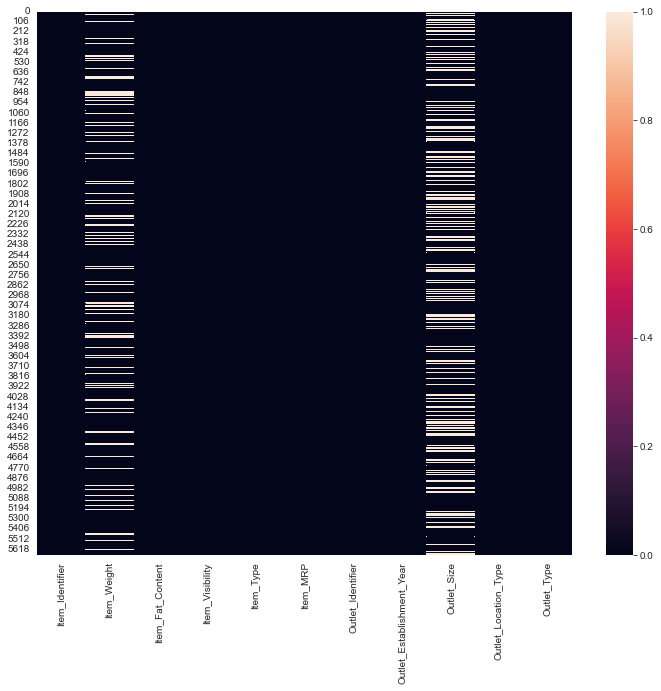

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(test0.isnull())

In [16]:
missing_values = test0.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(test0))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                           Missing Values  % Missing data
Outlet_Size                          1606       28.269671
Item_Weight                           976       17.180074
Outlet_Type                             0        0.000000
Outlet_Location_Type                    0        0.000000
Outlet_Establishment_Year               0        0.000000
Outlet_Identifier                       0        0.000000
Item_MRP                                0        0.000000
Item_Type                               0        0.000000
Item_Visibility                         0        0.000000
Item_Fat_Content                        0        0.000000
Item_Identifier                         0        0.000000


#### Observation:
1. 28.27% missing data in Outlet size of test set.
2. 17.16% missing data in Item weight of test set.

<h2 align="center"><font color = "red">EDA : Categorical Feature Analysis...</font> </h2>

### Categorical features :
1. Outlet_Size
2. Outlet_Type
3. Outlet_Location_Type
4. Outlet_Establishment_Year
5. Outlet_Identifier
6. Item_Type
7. Item_Fat_Content
8. Item_Identifier

## Univariate Analysis

### 1. Outlet_Identifier

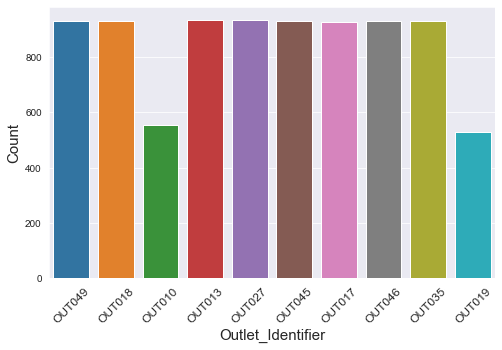

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(train0['Outlet_Identifier'])
plt.xticks(fontsize = 12, rotation=45)
plt.ylabel(ylabel = 'Count', fontsize = 15)
plt.xlabel(xlabel = 'Outlet_Identifier', fontsize = 15)
plt.show()

In [18]:
train0['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [19]:
train0['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [20]:
train0.pivot_table(values='Item_Outlet_Sales', index='Outlet_Identifier').sort_values(by = 'Item_Outlet_Sales',ascending = False)

,Item_Outlet_Sales
Outlet_Identifier,
OUT027,3694.038558
OUT035,2438.841866
OUT049,2348.354635
OUT017,2340.675263
OUT013,2298.995256
OUT046,2277.844267
OUT045,2192.384798
OUT018,1995.498739
OUT019,340.329723


#### Observation :
1. there are total 10 outlets. out of which OUT010 & OUT019 are smaller outles.
2. OUT027 generates max revenue of the all & OUT010 generates minimum.

### 2. Item_Fat_Content

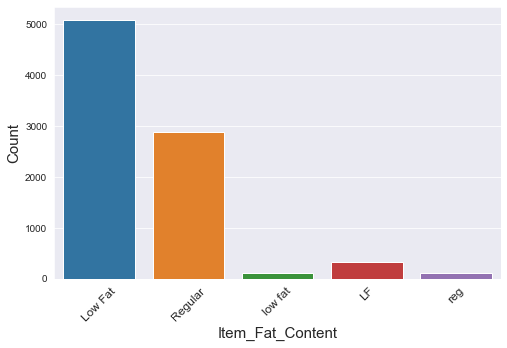

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(train0['Item_Fat_Content'])
plt.xticks(fontsize = 12, rotation=45)
plt.ylabel(ylabel = 'Count', fontsize = 15)
plt.xlabel(xlabel = 'Item_Fat_Content', fontsize = 15)
plt.show()

In [22]:
train0['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

#### Observation :
1. Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘reg’.
2. Low fat items units are in high quantity compared to regualar ones. 

### 3. Item_Type

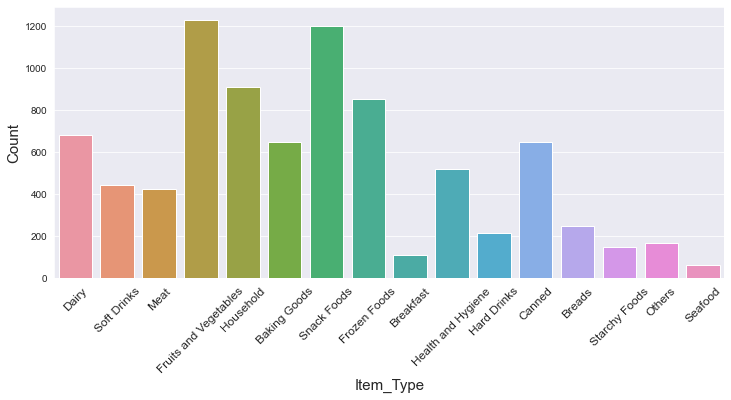

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(train0['Item_Type'])
plt.xticks(fontsize = 12, rotation=45)
plt.ylabel(ylabel = 'Count', fontsize = 15)
plt.xlabel(xlabel = 'Item_Type', fontsize = 15)
plt.show()

In [24]:
train0['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [25]:
train0['Item_Type'].nunique()

16

In [26]:
#Check the mean sales by Outlet_Establishment_Year:
train0.pivot_table(values='Item_Outlet_Sales', index='Item_Type').sort_values(by = 'Item_Outlet_Sales',ascending = False)

,Item_Outlet_Sales
Item_Type,
Starchy Foods,2374.332773
Seafood,2326.065928
Fruits and Vegetables,2289.009592
Snack Foods,2277.321739
Household,2258.784300
Dairy,2232.542597
Canned,2225.194904
Breads,2204.132226
Meat,2158.977911


#### Observation:
1. there are 16 unique product categories out of which Fruits and Vegetables' & 'Snack Foods' are consumed mostly.
2. Consuption of Seafood & Breakfasts are vely low. but revenue from seafod is high.
3. Starchy Foods, Seafood, Fruits and Vegetables, Snack Foods & Household items generate handsome revenue.

### 4. Item_Identifier

In [27]:
train0['Item_Identifier'].sample(15)

2721    DRE03
5988    FDS50
5990    FDQ07
7761    FDH53
6446    NCT41
1671    FDG16
7422    FDA50
8500    NCQ42
8415    FDR46
6527    DRH11
1565    FDE16
4325    FDB50
1888    FDS25
458     DRB48
7900    FDD17
Name: Item_Identifier, dtype: object

In [28]:
train0['Item_Identifier'].nunique()

1559

In [29]:
# train0['Item_Identifier_type'] = 
temp1 = train0['Item_Identifier'].apply(lambda x: x[0:2])

In [30]:
temp1

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Identifier, Length: 8523, dtype: object

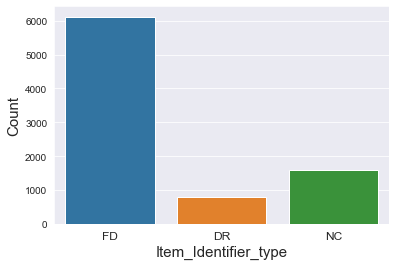

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(temp1)
plt.xticks(fontsize = 12)
plt.ylabel(ylabel = 'Count', fontsize = 15)
plt.xlabel(xlabel = 'Item_Identifier_type', fontsize = 15)
plt.show()

#### Observation:
1. There are 1599 products within 16 different item categories in train data
1. There are mainly 3 type of Item_Identifier from 1599 products as FD DR & NC

### 5. Outlet_Establishment_Year

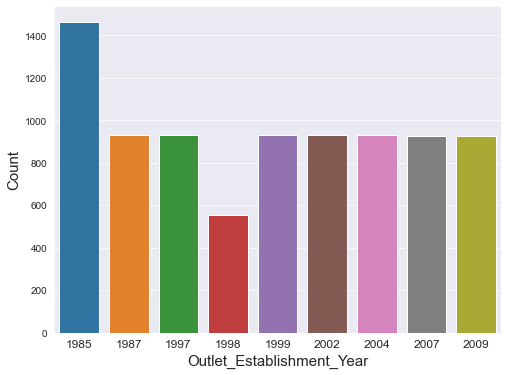

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(train0['Outlet_Establishment_Year'])
plt.xticks(fontsize = 12)
plt.ylabel(ylabel = 'Count', fontsize = 15)
plt.xlabel(xlabel = 'Outlet_Establishment_Year', fontsize = 15)
plt.show()

In [33]:
train0['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [34]:
#Check the mean sales by Outlet_Establishment_Year:
train0.pivot_table(values='Item_Outlet_Sales', index='Outlet_Establishment_Year').sort_values(by = 'Item_Outlet_Sales',ascending = False)

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,2483.677474
2004,2438.841866
1999,2348.354635
2007,2340.675263
1987,2298.995256
1997,2277.844267
2002,2192.384798
2009,1995.498739
1998,339.351662


#### Observation:
1. There are 1463 ites being sold from the outlet established in 1985, they also generates high revenues. These must be famous in the nearby locality.
2. the newest outlet has 928 items in their shelves.
3. outlets established in 1998 are generating very low revenue, looks like they are far away from the city or not located in crowded place.

### 6. Outlet_Size

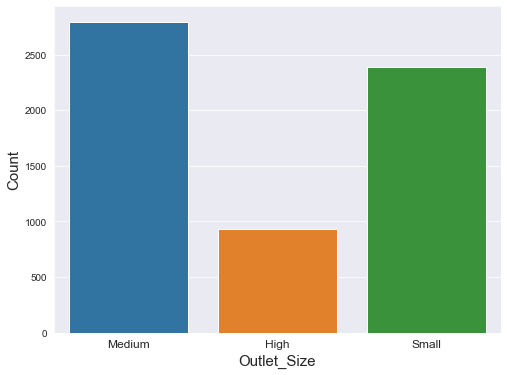

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(train0['Outlet_Size'])
plt.xticks(fontsize = 12)
plt.ylabel(ylabel = 'Count', fontsize = 15)
plt.xlabel(xlabel = 'Outlet_Size', fontsize = 15)
plt.show()

In [36]:
train0['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [37]:
#Check the mean sales by Outlet_Size:
train0.pivot_table(values='Item_Outlet_Sales', index='Outlet_Size').sort_values(by = 'Item_Outlet_Sales',ascending = False)

,Item_Outlet_Sales
Outlet_Size,
Medium,2681.603542
High,2298.995256
Small,1912.149161


#### Observation:
1. There ar 2793 outlets are of medium size generating higher revenue from the other, 2388 are Small & 932 are High size outlets.

### 7. Outlet_Location_Type

In [38]:
train0['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

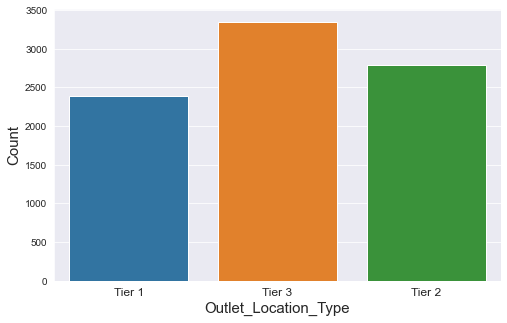

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(train0['Outlet_Location_Type'])
plt.xticks(fontsize = 12)
plt.ylabel(ylabel = 'Count', fontsize = 15)
plt.xlabel(xlabel = 'Outlet_Location_Type', fontsize = 15)
plt.show()

In [40]:
#Check the mean sales by Outlet_Location_Type:
train0.pivot_table(values='Item_Outlet_Sales', index='Outlet_Location_Type').sort_values(by = 'Item_Outlet_Sales',ascending = False)

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 2,2323.990559
Tier 3,2279.627651
Tier 1,1876.909159


#### Observation:
Outlets from Tier 2 cities Genearte maximum revenue as compare to Tier 1 & Tier 3 cities.

## Sub Categorical Analysis - Bivariate analysis.

### 1. different type of items sold by every outlet

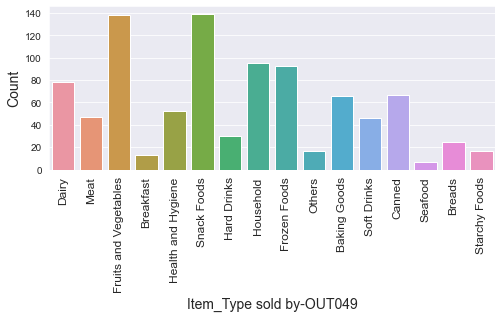

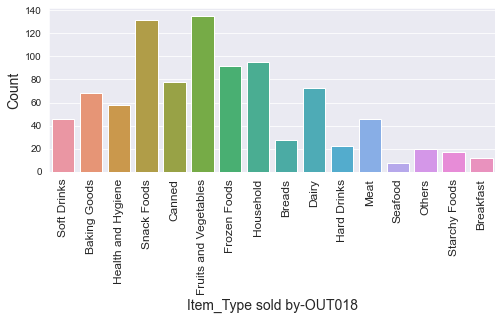

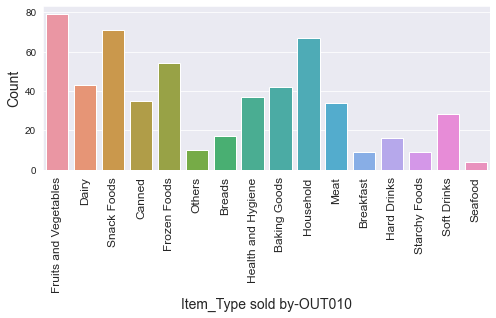

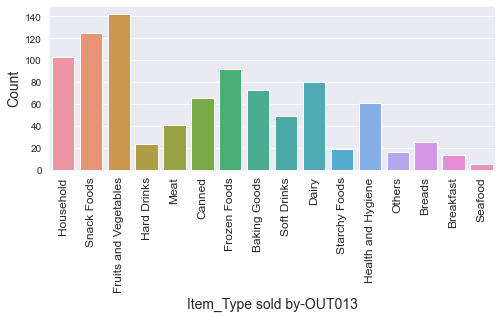

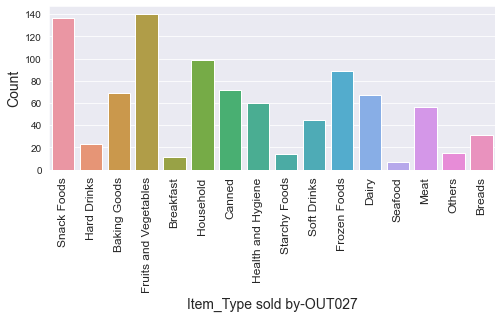

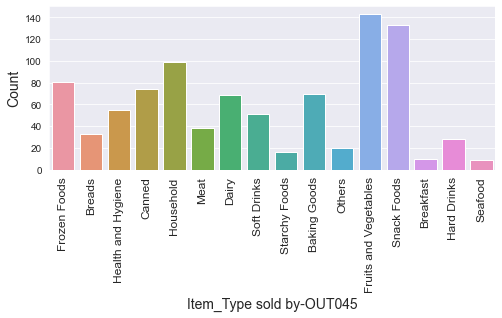

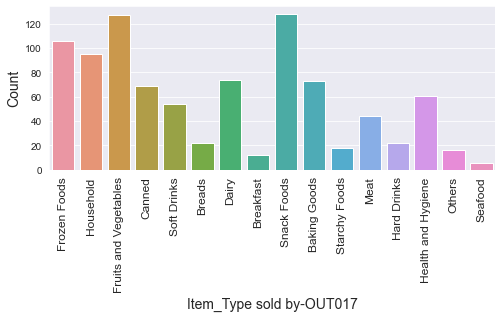

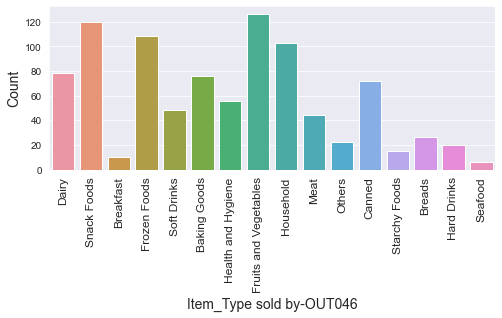

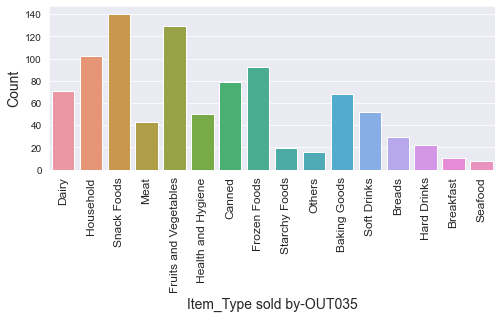

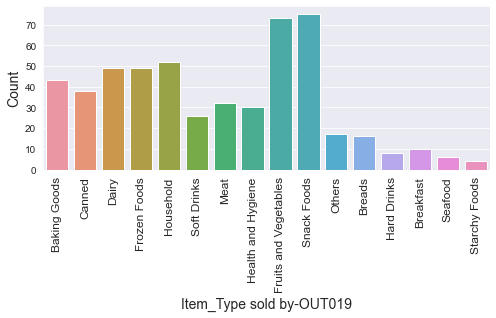

In [41]:
for i in train0['Outlet_Identifier'].unique().tolist():
    plt.figure(figsize=(8,3))
    sns.countplot(train0[train0['Outlet_Identifier'] == i]['Item_Type'])
    plt.xticks(fontsize = 12, rotation=90)
    plt.ylabel(ylabel = 'Count', fontsize = 14)
    plt.xlabel(xlabel = 'Item_Type sold by-' + i, fontsize = 14)
    plt.show()

### 2. Revenue from different type of items sold by every outlet

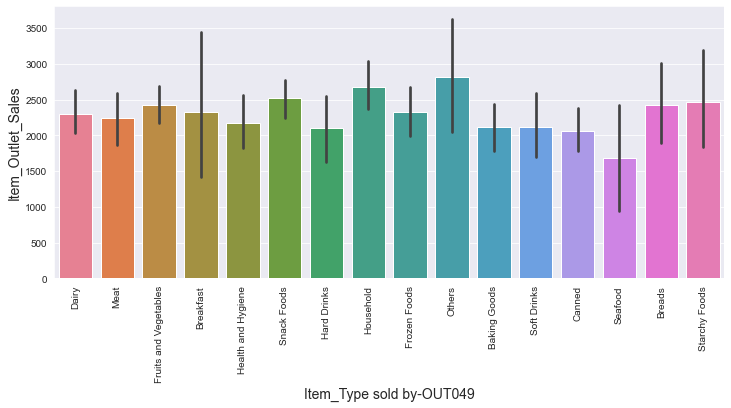

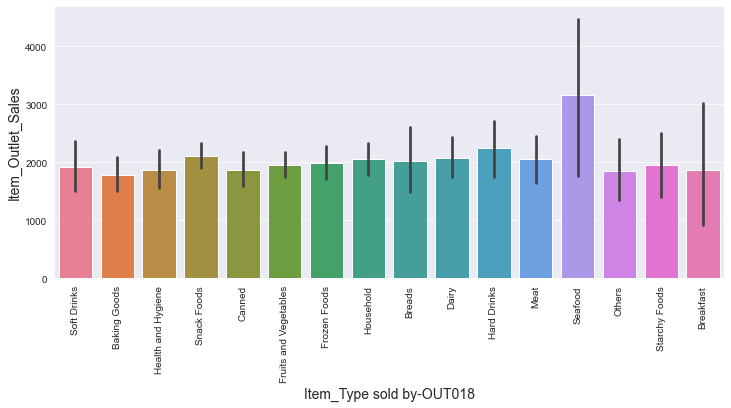

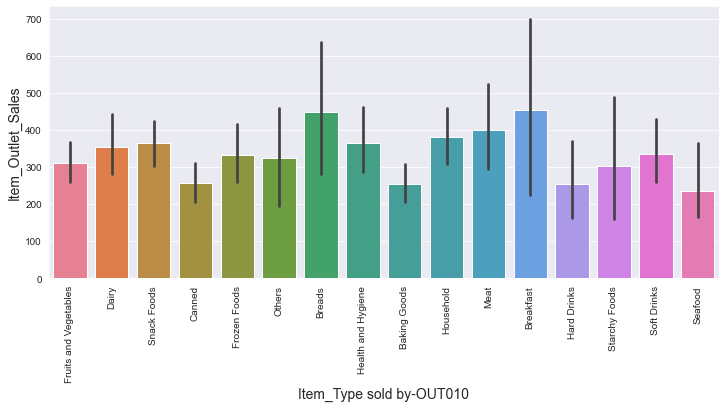

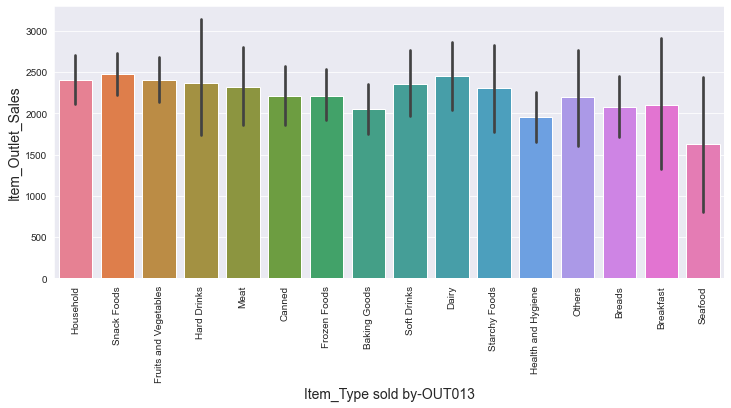

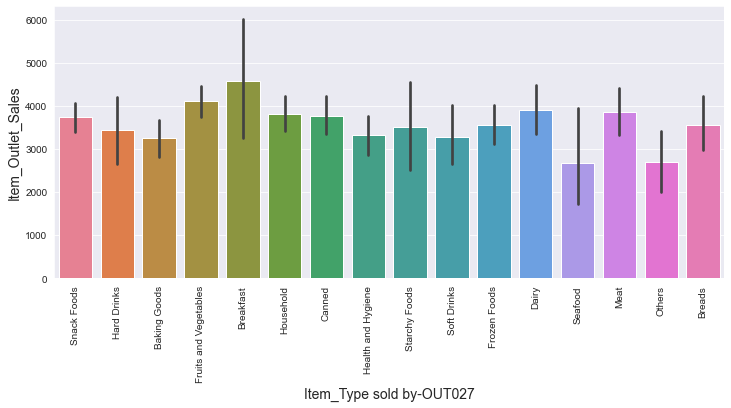

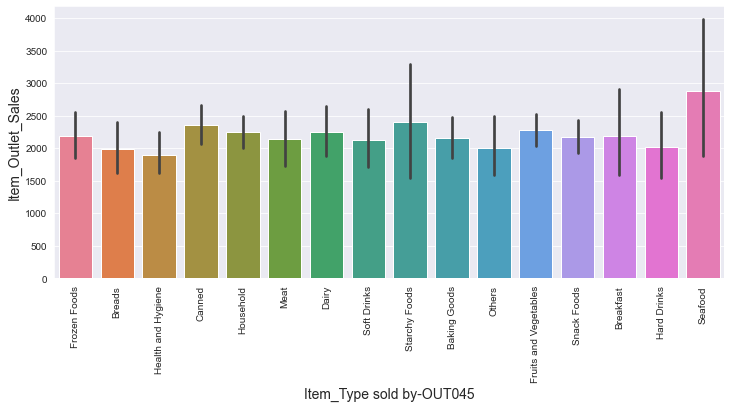

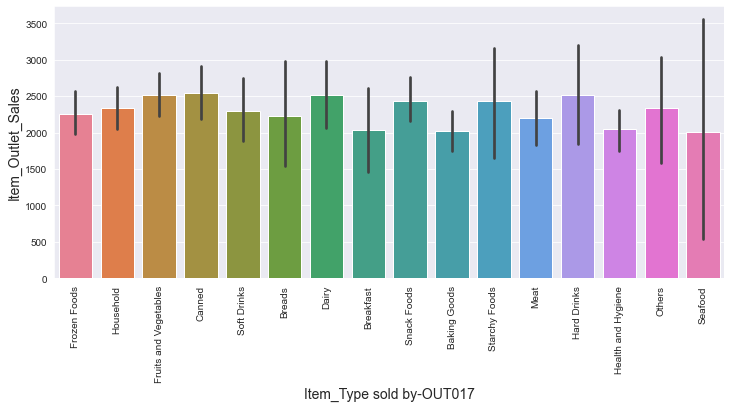

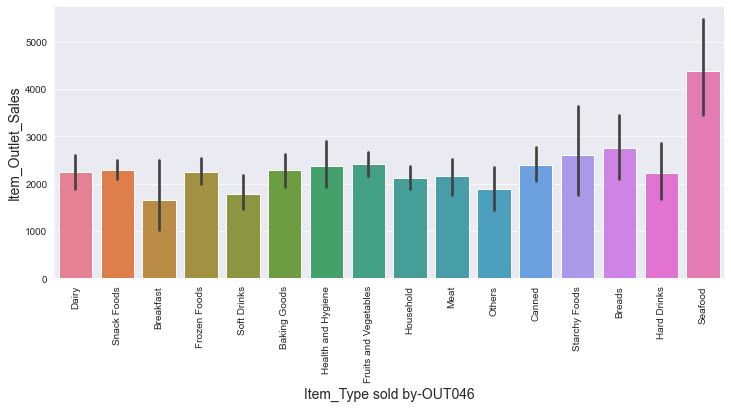

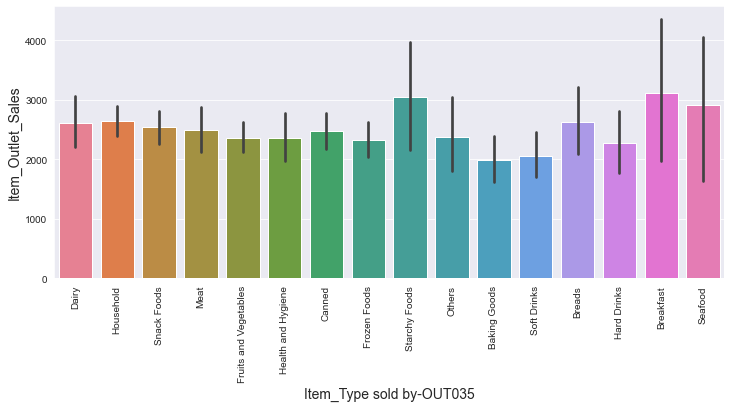

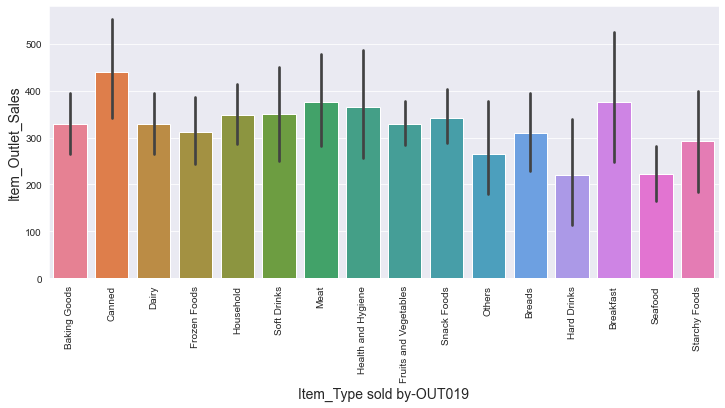

In [42]:
for i in train0['Outlet_Identifier'].unique().tolist():
    plt.figure(figsize=(12,5))
#     sns.countplot(train0[train0['Outlet_Identifier'] == i]['Item_Type'])
    sns.barplot(x="Item_Type", y="Item_Outlet_Sales", data=train0[train0['Outlet_Identifier'] == i], palette="husl");
    plt.xticks(fontsize = 10, rotation=90)
    plt.ylabel(ylabel = 'Item_Outlet_Sales', fontsize = 14)
    plt.xlabel(xlabel = 'Item_Type sold by-' + i, fontsize = 14)
    plt.show()

### 3. Average Revenue from each outlet

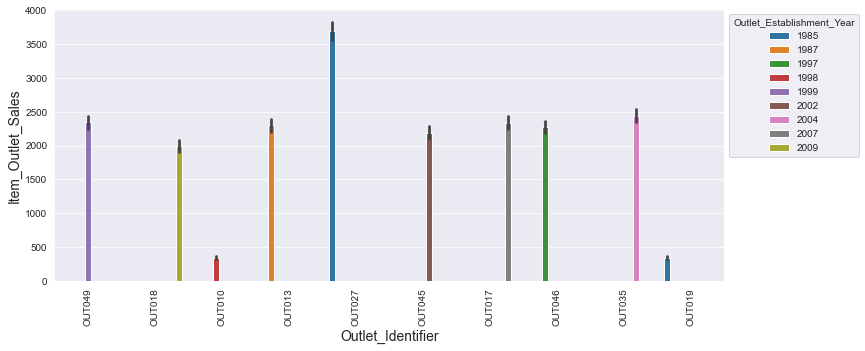

In [43]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x="Outlet_Identifier", y="Item_Outlet_Sales",hue ='Outlet_Establishment_Year', data=train0,)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(fontsize = 10, rotation=90)
plt.ylabel(ylabel = 'Item_Outlet_Sales', fontsize = 14)
plt.xlabel(xlabel = 'Outlet_Identifier', fontsize = 14)
plt.show()

### 4. outlets by establishment year

In [44]:
for i in train0['Outlet_Establishment_Year'].unique().tolist():
    x = train0[train0['Outlet_Establishment_Year'] == i]['Outlet_Identifier'].unique()
    print(f'{x} established in {i}.')

['OUT049'] established in 1999.
['OUT018'] established in 2009.
['OUT010'] established in 1998.
['OUT013'] established in 1987.
['OUT027' 'OUT019'] established in 1985.
['OUT045'] established in 2002.
['OUT017'] established in 2007.
['OUT046'] established in 1997.
['OUT035'] established in 2004.


#### Observation:
1. OUT019 & OUT027 are oldest outlet, while OUT018 is the newest one.

### 5. Outlet_Size & Outlet_Type

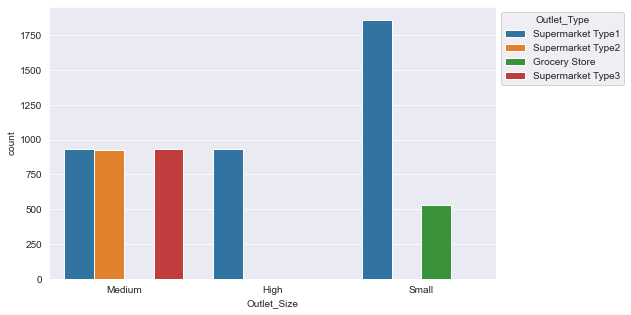

In [45]:
plt.figure(figsize=(8,5))
ax = sns.countplot('Outlet_Size',hue='Outlet_Type',data=train0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#### Observation:
1. There are no Grocery store in medium sized outlet.
2. Big/High Sized outleta are of Supermarket type1 only.
3. Small Outlets have high number of Supermarket type1 no other type except grocery.

### 6. Outlet_Size,  Outlet_Type & Outlet_Identifier with Item_Outlet_Sales

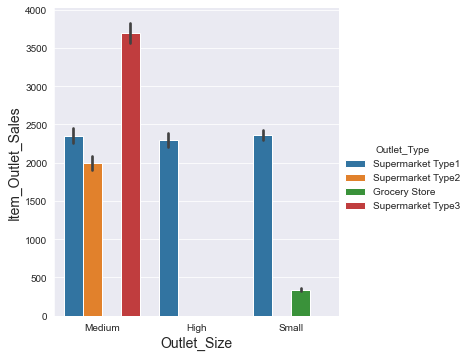

In [46]:
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", hue ='Outlet_Type',  data=train0, kind="bar")
plt.ylabel(ylabel = 'Item_Outlet_Sales', fontsize = 14)
plt.xlabel(xlabel = 'Outlet_Size', fontsize = 14)
plt.show()

#### Observation:
1. in all 3 categories of outlet size, Supermarket of type1 generates equal sales/revenue.
2. in medium sized outlet Supermarket of type3 generates high sales.
3. in small sized outlets Grocery store generates very low sales.

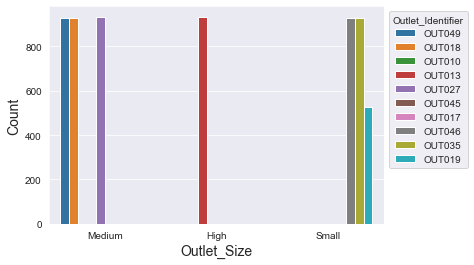

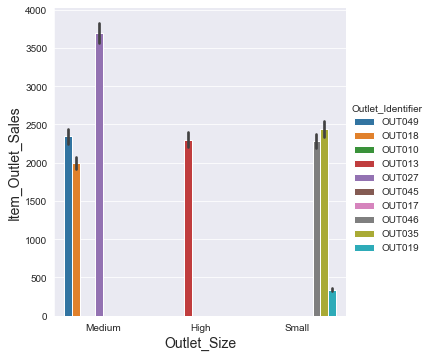

In [47]:
ax = sns.countplot(x="Outlet_Size", hue ='Outlet_Identifier',  data=train0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel(ylabel = 'Count', fontsize = 14)
plt.xlabel(xlabel = 'Outlet_Size', fontsize = 14)
plt.show()

sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", hue ='Outlet_Identifier',  data=train0, kind="bar")
plt.ylabel(ylabel = 'Item_Outlet_Sales', fontsize = 14)
plt.xlabel(xlabel = 'Outlet_Size', fontsize = 14)
plt.show()

#### Observation:
1. OUT049, OUT018 & OUT027 are medium sized outlets.
2. OUT013 is big sized Outlet.
3. OUT046, OUT035 & OUT019 are small sized outlet
4. <b>OUT010, OUT045 & OUT017 are not categorized as big, small or medium.</b>


### 7. Outlet Location type, Outlet_Size,  Outlet_Type & Outlet_Identifier with Item_Outlet_Sales

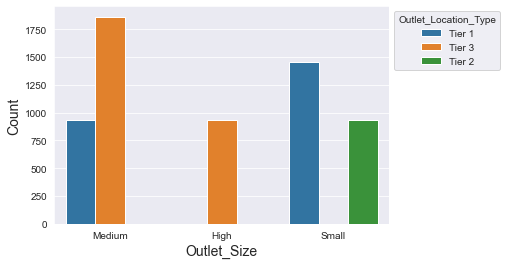

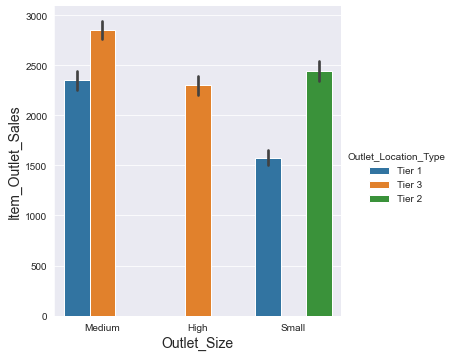

In [48]:
ax = sns.countplot(x="Outlet_Size", hue ='Outlet_Location_Type',  data=train0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel(ylabel = 'Count', fontsize = 14)
plt.xlabel(xlabel = 'Outlet_Size', fontsize = 14)
plt.show()

sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", hue ='Outlet_Location_Type',  data=train0, kind="bar")
plt.ylabel(ylabel = 'Item_Outlet_Sales', fontsize = 14)
plt.xlabel(xlabel = 'Outlet_Size', fontsize = 14)
plt.show()

#### Observation:
1. In Tier1 cities, only Medium & small sized outlets are present.
2. In Tier2 cities, only small outlets are ther.
3. In tier3 cities, Medium & high sized outlets are present.


4. small outlets from tier2 cities generates high revenues compared to small outlets from tier1 cities.
5. Medium & high sized outlets contribute mostly in revenue.

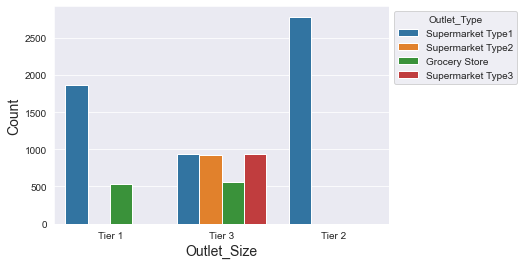

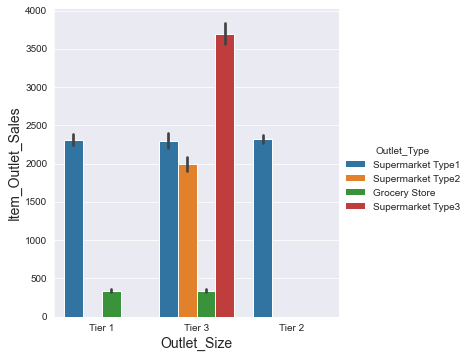

In [49]:
ax = sns.countplot(x="Outlet_Location_Type", hue ='Outlet_Type',  data=train0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel(ylabel = 'Count', fontsize = 14)
plt.xlabel(xlabel = 'Outlet_Size', fontsize = 14)
plt.show()

sns.catplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", hue ='Outlet_Type',  data=train0, kind="bar")
plt.ylabel(ylabel = 'Item_Outlet_Sales', fontsize = 14)
plt.xlabel(xlabel = 'Outlet_Size', fontsize = 14)
plt.show()

#### Observation:
1. In Tier1 cities, only supermarket type1 & grocery store outlets are present.
2. In Tier2 cities, only super market type1 outlets are there.
3. In tier3 cities, high number of type3, similar number of type1 & type2 supermarkets present, it also hasm some number of frocery stores.


4. supermarkets type2 outlets from tier3 cities generates high revenues.
5. tier2 has only one type of supermarket generating revenue. i.e Type1 supermarket.
6. type1 generates high revenue in tier1 cities.


7. Type1 supermarket generates almost similar revenues in all cities

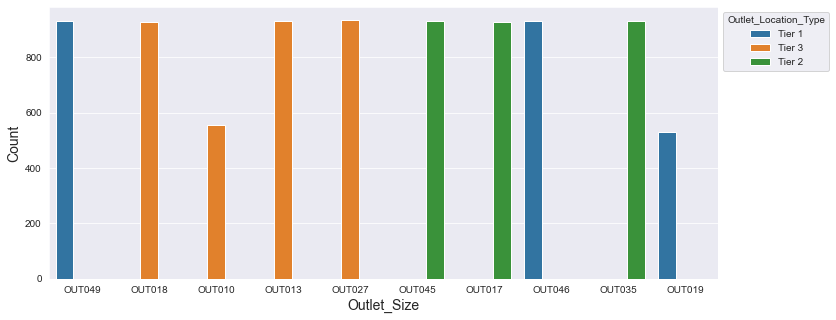

<Figure size 864x360 with 0 Axes>

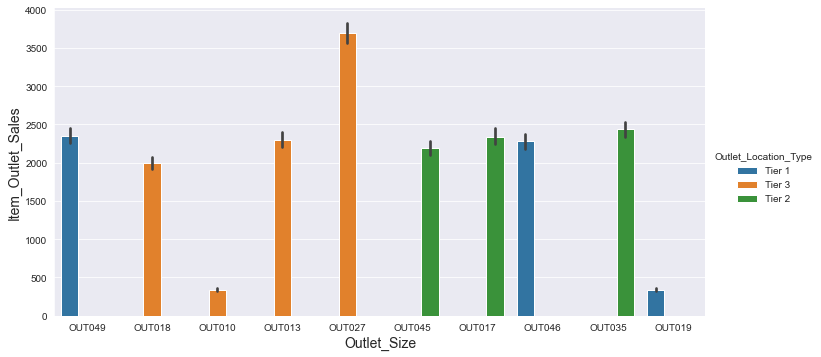

In [50]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x="Outlet_Identifier", hue ='Outlet_Location_Type',  data=train0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel(ylabel = 'Count', fontsize = 14)
plt.xlabel(xlabel = 'Outlet_Size', fontsize = 14)
plt.show()


plt.figure(figsize=(12,5))
sns.catplot(x="Outlet_Identifier", y="Item_Outlet_Sales", hue ='Outlet_Location_Type',  data=train0, kind="bar", height=5, aspect=2)
plt.ylabel(ylabel = 'Item_Outlet_Sales', fontsize = 14)
plt.xlabel(xlabel = 'Outlet_Size', fontsize = 14)
plt.show()

#### Observation:
1. Outlets 019, 046 & 049 are in tier 1 cities.
2. Outlets 017, 035 & 045 are in tier 2 cities.
3. Outlets 010, 013, 018 & 027 are in tier 3 cities.


4. Outlets from tier 2 & 1 cities generate similar sales/revenue except OUT019 from Tier1.
5. Outlets from tier 3 generate diferent revenues.

<h2 align="center"><font color = "red">EDA : Numerical Feature Analysis...</font> </h2>

### Numerical features :
1. Item Weight
2. Item_MRP
3. Item_Visibility

In [51]:
train0_num = train0.drop('Outlet_Establishment_Year', axis = 1).select_dtypes(np.number)

In [52]:
train0_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


In [53]:
train0_num.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


#### Observation:
1. Item_MRP & Item_Outlet_Sales have max difference in 75th quantile & maximum value. Standard deviation is also high.

## Univariate Analysis

### 1. Distribution

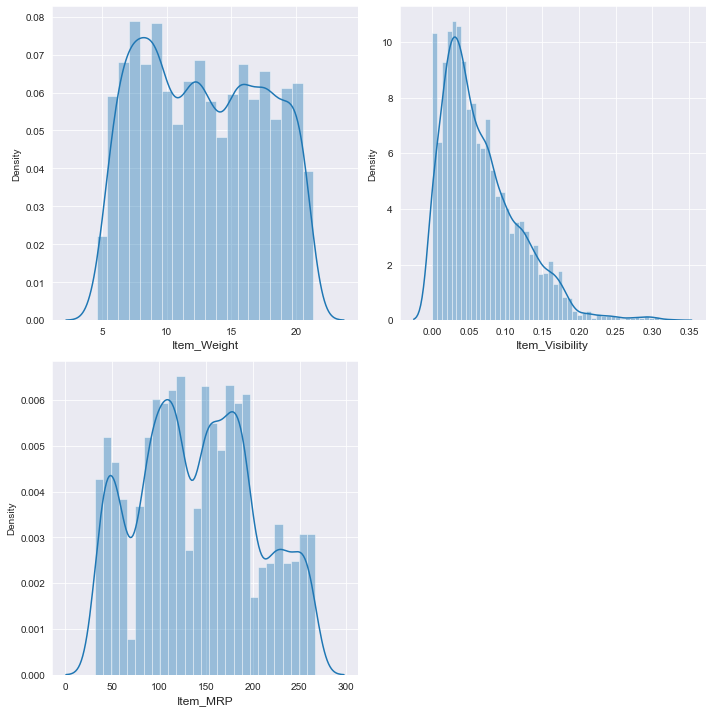

In [54]:
# train0_num.hist

#distribution of numerical features.. 
i=0
plt.figure(figsize=(10,10))
for column in train0_num.drop('Item_Outlet_Sales', axis = 1).columns:
    plt.subplot(2,2,i+1)
    sns.distplot(train0_num[column])
    plt.xlabel(column,fontsize=12)
    i+=1
    
plt.tight_layout()

#### Observation:
1. Item_visibility has right skewed distribution.
2. Item-Weight has almost a uniform distribution.
3. Item_MRP is not normally distributed.

### 2. Outliers

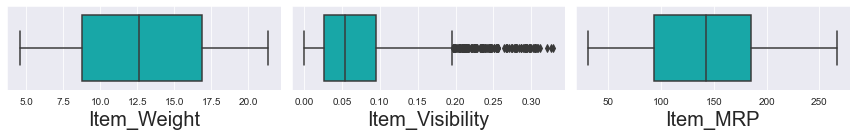

In [55]:
plt.figure(figsize=(12,2), facecolor='white')
plotnumber =1
for column in train0_num.drop('Item_Outlet_Sales', axis = 1).columns:
    if plotnumber <=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.boxplot(train0_num[column], color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

#### Observation :
1. There may be some oytliers in Iten_Visibility.

### 3. Skewness

In [56]:
 jj_temp = train0_num.drop('Item_Outlet_Sales', axis = 1)

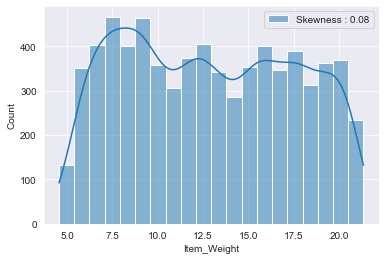

In [57]:
sns.histplot(jj_temp['Item_Weight'],kde=True, label="Skewness : %.2f"%(jj_temp['Item_Weight'].skew())).legend(loc="best")

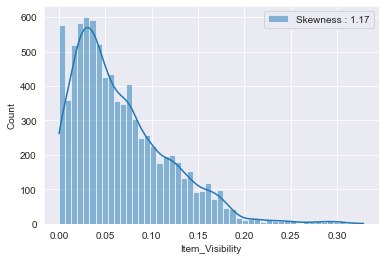

In [58]:
sns.histplot(jj_temp['Item_Visibility'],kde=True, label="Skewness : %.2f"%(jj_temp['Item_Visibility'].skew())).legend(loc="best")

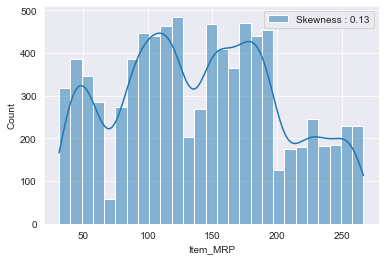

In [59]:
sns.histplot(jj_temp['Item_MRP'],kde=True, label="Skewness : %.2f"%(jj_temp['Item_MRP'].skew())).legend(loc="best")

#### Observation :
1. Skewness presint in Item_Visibility with skewness values of 1.17.
2. MRP & Item_Weigh have no skewness.

## Bivariate Analysis

### 1. Distrubution with pairplot

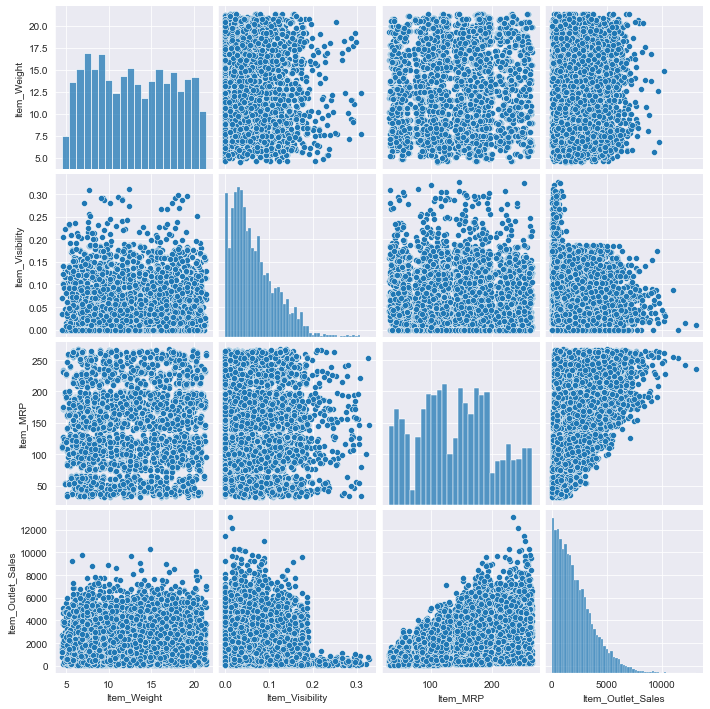

In [60]:
sns.pairplot(train0_num)

#### Observation:
1. Item_MRP is related to Item_Outlet_Sales.
2. other numerical features have no clear relation with Item_Outlet_Sales.

### 2. Correlation plot

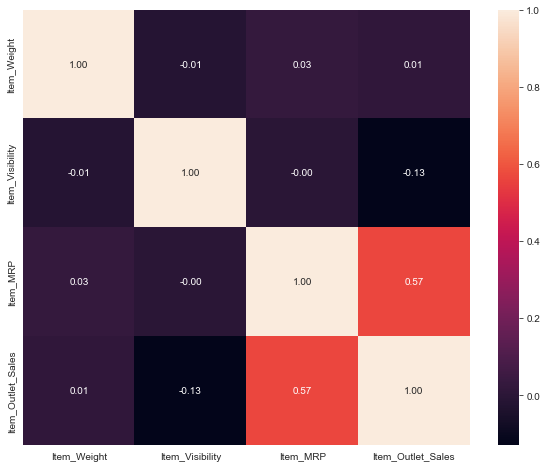

In [61]:
#Heatmap of numerical columns
plt.figure(figsize = (10, 8))
sns.heatmap(train0_num.corr(),annot=True, fmt = ".2f")
plt.show()

#### Observation:
1. It is clear from heatmap that MRP has highest Psitive correlation with sales amongst the numerical features.
2. Item weight has no correlation at all.

<h2 align="center"><font color = "red">Data Preprocessing</font> </h2>

# doing preprocessing for Train & Test set side by side 

In [65]:
train2 = train0.copy()
test2 = test0.copy()

### Ensure Proper Data Types

In [66]:
train2.select_dtypes(np.number)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [67]:
test2.select_dtypes(np.number)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750,0.007565,107.8622,1999
1,8.300,0.038428,87.3198,2007
2,14.600,0.099575,241.7538,1998
3,7.315,0.015388,155.0340,2007
4,NaN,0.118599,234.2300,1985
...,...,...,...,...
5676,10.500,0.013496,141.3154,1997
5677,7.600,0.142991,169.1448,2009
5678,10.000,0.073529,118.7440,2002
5679,15.300,0.000000,214.6218,2007


In [68]:
# As Establishment year is Categorical data converting it to string value
train2['Outlet_Establishment_Year'] = train2['Outlet_Establishment_Year'].astype(str)
test2['Outlet_Establishment_Year'] = test2['Outlet_Establishment_Year'].astype(str)

<h1 align = "center"><font color = "magenta"><b>1. Filling Missing values in Categorical data</b></font></h1>

## Filling missing values in Outlet_Size Column..

In [69]:
train2['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [70]:
test2['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

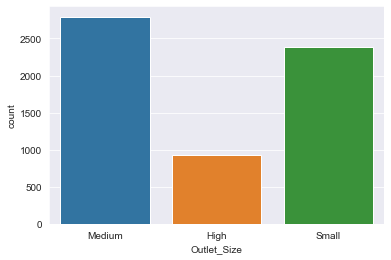

In [71]:
# Checking Outlet Size Count
g = sns.countplot(train2['Outlet_Size'])
g = g.set_xticklabels(['Medium', 'High','Small'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

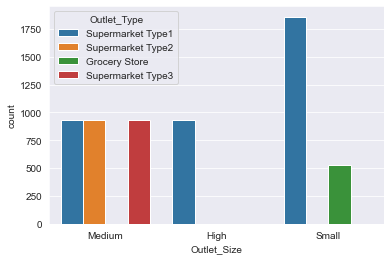

In [72]:
#Outlet_Size Count Segregated based on Outlet Type..
sns.countplot('Outlet_Size',hue='Outlet_Type',data=train2)

In [73]:
from scipy.stats import mode
#Determing the mode for each
outlet_size_mode_train = train2.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
outlet_size_mode_test = test2.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )

In [74]:
outlet_size_mode_train

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [75]:
outlet_size_mode_test

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [76]:
## Filling missing values in Outlet-Size Column based on the outlet type.
miss_bool_train = train2['Outlet_Size'].isnull() 
train2.loc[miss_bool_train,'Outlet_Size'] = train2.loc[miss_bool_train,'Outlet_Type'].apply(lambda x: outlet_size_mode_train[x])

miss_bool_test = test2['Outlet_Size'].isnull() 
test2.loc[miss_bool_test,'Outlet_Size'] = test2.loc[miss_bool_test,'Outlet_Type'].apply(lambda x: outlet_size_mode_test[x])

print(sum(train2['Outlet_Size'].isnull()))
print(sum(test2['Outlet_Size'].isnull()))

0
0


#### Observation:
The missing values in Outlet size are filled by mode method based on the Outlet type.

<h1 align = "center"><font color = "magenta"><b>2. filling missing values in numerical features.</b></font></h1>

## Filling Numerical missing values in Item_Weight..

### Filling the missing values in Item Weight column based on the similar type of Item_Identifier.

In [77]:
mean_item_weight_train =train2.groupby('Item_Identifier').agg({'Item_Weight':'mean'})
mean_item_weight_train.sort_values(by='Item_Weight', ascending=True)

,Item_Weight
Item_Identifier,
FDP40,4.555
DRE12,4.590
DRF23,4.610
FDX49,4.615
FDS23,4.635
...,...
FDR07,21.350
FDE52,NaN
FDK57,NaN


In [78]:
mean_item_weight_test =test2.groupby('Item_Identifier').agg({'Item_Weight':'mean'})
mean_item_weight_test.sort_values(by='Item_Weight', ascending=True)

,Item_Weight
Item_Identifier,
FDP40,4.555
DRE12,4.590
DRF23,4.610
FDX49,4.615
FDS23,4.635
...,...
FDO22,NaN
FDP28,NaN
FDT21,NaN


In [79]:
mean_item_weight_train['Item_Weight'].fillna(mean_item_weight_train['Item_Weight'].median(),inplace=True)
mean_item_weight_test['Item_Weight'].fillna(mean_item_weight_test['Item_Weight'].median(),inplace=True)

In [80]:
#dictionary with Item_Type values as keys and avg_wt values as values.
mean_zip_train=dict(zip(mean_item_weight_train.index,mean_item_weight_train.Item_Weight))

# This creates a column "mean_zip" and maps values into it based on corresponding values of 'Item_Identifier'
train2['mean_zip']=train2['Item_Identifier'].map(mean_zip_train)

#filling null values in 'Item_Weight' with values from 
train2['Item_Weight']=train2['Item_Weight'].fillna(train2['mean_zip'])

In [81]:
train2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,mean_zip
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,8.380
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210


In [82]:
#dictionary with Item_Type values as keys and avg_wt values as values.
mean_zip_test=dict(zip(mean_item_weight_test.index,mean_item_weight_test.Item_Weight))

# This creates a column "mean_zip" and maps values into it based on corresponding values of 'Item_Identifier'
test2['mean_zip']=test2['Item_Identifier'].map(mean_zip_test)

#filling null values in 'Item_Weight' with values from 
test2['Item_Weight']=test2['Item_Weight'].fillna(test2['mean_zip'])

In [83]:
test2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,mean_zip
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,20.750
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,8.300
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,14.600
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,7.315
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,13.600
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,10.500
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,7.600
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,10.000
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,15.300


In [84]:
train2['Item_Weight'].isnull().sum()

0

In [85]:
test2['Item_Weight'].isnull().sum()

0

In [86]:
train2.drop('mean_zip', axis=1, inplace=True)
test2.drop('mean_zip', axis=1, inplace=True)

In [87]:
print(train2['Item_Weight'].isnull().sum())
print(test2['Item_Weight'].isnull().sum())

0
0


#### Observation:
We have filled missing values in iterm_weight based on the item identifier column.

<h1 align = "center"><font color = "magenta"><b>3. Removing outliers & skewness from numerical columns.</b></font></h1>

### Outliers Removal

In [88]:
train2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [89]:
test2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1


In [90]:
out_skew_train = train2.select_dtypes(np.number)
out_skew_test = test2.select_dtypes(np.number)

In [91]:
out_skew_train

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
3,19.200,0.000000,182.0950,732.3800
4,8.930,0.000000,53.8614,994.7052
...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834
8519,8.380,0.046982,108.1570,549.2850
8520,10.600,0.035186,85.1224,1193.1136
8521,7.210,0.145221,103.1332,1845.5976


In [92]:
out_skew_test

,Item_Weight,Item_Visibility,Item_MRP
0,20.750,0.007565,107.8622
1,8.300,0.038428,87.3198
2,14.600,0.099575,241.7538
3,7.315,0.015388,155.0340
4,13.600,0.118599,234.2300
...,...,...,...
5676,10.500,0.013496,141.3154
5677,7.600,0.142991,169.1448
5678,10.000,0.073529,118.7440
5679,15.300,0.000000,214.6218


In [93]:
# creating a function to remove outliers using standard deviation method...
def get_outliers_std(data):
    
    #empty list to store index values
    all_indices = []
    
    for column in data.columns:
        data_mean, data_std = np.mean(data[column]), np.std(data[column])
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off

        index = np.where((data[column] < lower) | (data [column] > upper))

        all_indices.extend(index[0])
    
    set_res = set(all_indices)
    indices_to_remove = np.array(list(set_res))
#     print(indices_to_remove)
    return indices_to_remove #returns list of indices to remove outliers

# data.drop(data.index[indices_to_remove])

In [94]:
to_remove_train = get_outliers_std(out_skew_train)

In [95]:
to_remove_test = get_outliers_std(out_skew_test)

In [96]:
train3 = train2.drop(train2.index[to_remove_train])
test3 = test2.drop(test2.index[to_remove_test])

In [97]:
out_removed_train = train3.select_dtypes(np.number)
out_removed_test = test3.select_dtypes(np.number)

In [98]:
out_removed_train

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
3,19.200,0.000000,182.0950,732.3800
4,8.930,0.000000,53.8614,994.7052
...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834
8519,8.380,0.046982,108.1570,549.2850
8520,10.600,0.035186,85.1224,1193.1136
8521,7.210,0.145221,103.1332,1845.5976


In [99]:
out_removed_test

,Item_Weight,Item_Visibility,Item_MRP
0,20.750,0.007565,107.8622
1,8.300,0.038428,87.3198
2,14.600,0.099575,241.7538
3,7.315,0.015388,155.0340
4,13.600,0.118599,234.2300
...,...,...,...
5676,10.500,0.013496,141.3154
5677,7.600,0.142991,169.1448
5678,10.000,0.073529,118.7440
5679,15.300,0.000000,214.6218


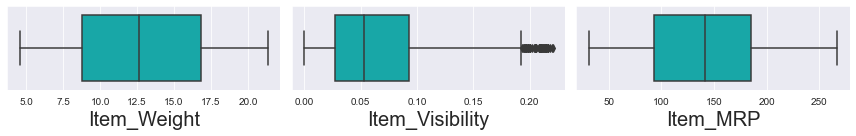

In [100]:
plt.figure(figsize=(12,2), facecolor='white')
plotnumber =1
for column in out_removed_train.columns:
    if plotnumber <=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.boxplot(out_removed_train[column], color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

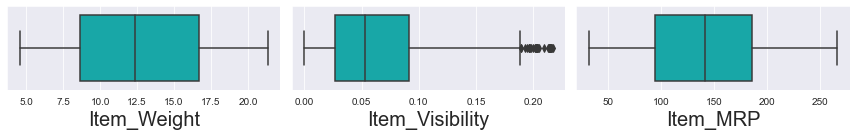

In [101]:
plt.figure(figsize=(12,2), facecolor='white')
plotnumber =1
for column in out_removed_test.columns:
    if plotnumber <=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.boxplot(out_removed_test[column], color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [102]:
data_loss=((train2.shape[0]-train3.shape[0])/train2.shape[0])*100
print("data loss in train ", data_loss, " %")

data loss in train  2.170597207556025  %


In [103]:
data_loss=((test2.shape[0]-test3.shape[0])/test2.shape[0])*100
print("data loss in test ", data_loss, " %")

data loss in test  1.425805315965499  %


#### Obseravtion:
1. Outliers in train are removed with data loss of 2.17%.
2. Outliers in test are removed with data loss of 1.42%.

### Skewness Removal..

In [104]:
from scipy.stats import yeojohnson

In [105]:
train3['Item_Visibility'].skew()

0.7942719009942432

In [106]:
test3['Item_Visibility'].skew()

0.7878605415814712

In [107]:
train3['Item_Vis_yeo'] = pd.Series(yeojohnson(train3['Item_Visibility'])[0])
test3['Item_Vis_yeo'] = pd.Series(yeojohnson(test3['Item_Visibility'])[0])

In [108]:
train3['Item_Vis_yeo'].skew()

0.11278986077231044

In [109]:
test3['Item_Vis_yeo'].skew()

0.10545762439330052

In [110]:
train4 = train3.drop('Item_Visibility', axis=1)
test4 = test3.drop('Item_Visibility', axis=1)

In [111]:
train4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Vis_yeo
0,FDA15,9.30,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.014944
1,DRC01,5.92,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.017702
2,FDN15,17.50,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.015559
3,FDX07,19.20,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,-0.000000
4,NCD19,8.93,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,-0.000000


In [112]:
test4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Vis_yeo
0,FDW58,20.750,Low Fat,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.007316
1,FDW14,8.300,reg,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,0.032599
2,NCN55,14.600,Low Fat,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,0.066732
3,FDQ58,7.315,Low Fat,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,0.014384
4,FDY38,13.600,Regular,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,0.074296


In [113]:
skew_removed_train = train4.select_dtypes(np.number)
skew_removed_test = test4.select_dtypes(np.number)

In [114]:
skew_removed_train.drop('Item_Outlet_Sales', axis=1).skew()

Item_Weight     0.069972
Item_MRP        0.138990
Item_Vis_yeo    0.112790
dtype: float64

In [115]:
skew_removed_test.skew()

Item_Weight     0.142439
Item_MRP        0.133061
Item_Vis_yeo    0.105458
dtype: float64

#### Observation:
Skewness is within the range of+/-0.5 for numerical features. Hence there is no skewness now.

## Removing zero entries from item visibility

In [116]:
train4['Item_Vis_yeo']=train4['Item_Vis_yeo'].replace(0,np.nan)
test4['Item_Vis_yeo']=test4['Item_Vis_yeo'].replace(0,np.nan)

In [117]:
train4['Item_Vis_yeo'].fillna(train4['Item_Vis_yeo'].median(),inplace=True)
test4['Item_Vis_yeo'].fillna(test4['Item_Vis_yeo'].median(),inplace=True)

<h1 align = "center"><font color = "magenta"><b>4. Multicollinearity check on Train Set only.</b></font></h1>

In [118]:
train4.describe()

,Item_Weight,Item_MRP,Item_Outlet_Sales,Item_Vis_yeo
count,8338.000000,8338.000000,8338.00000,8338.000000
mean,12.873645,140.094906,2134.49012,0.046618
std,4.645709,61.925137,1580.16083,0.022361
min,4.555000,31.290000,33.29000,0.003532
25%,8.785000,93.354100,852.22400,0.029019
50%,12.650000,141.948300,1794.33100,0.044709
75%,16.850000,184.784500,3075.99600,0.063386
max,21.350000,266.888400,7298.49960,0.099298


In [119]:
test4.describe()

,Item_Weight,Item_MRP,Item_Vis_yeo
count,5600.000000,5600.000000,5600.000000
mean,12.688239,141.126934,0.046398
std,4.654930,61.771211,0.022111
min,4.555000,31.990000,0.003535
25%,8.645000,94.446200,0.028781
50%,12.350000,141.531200,0.044862
75%,16.700000,186.098350,0.062659
max,21.350000,266.588400,0.099578


In [120]:
skew_removed_train.corr()

,Item_Weight,Item_MRP,Item_Outlet_Sales,Item_Vis_yeo
Item_Weight,1.000000,0.024145,0.006592,0.013055
Item_MRP,0.024145,1.000000,0.569544,-0.011950
Item_Outlet_Sales,0.006592,0.569544,1.000000,-0.001426
Item_Vis_yeo,0.013055,-0.011950,-0.001426,1.000000


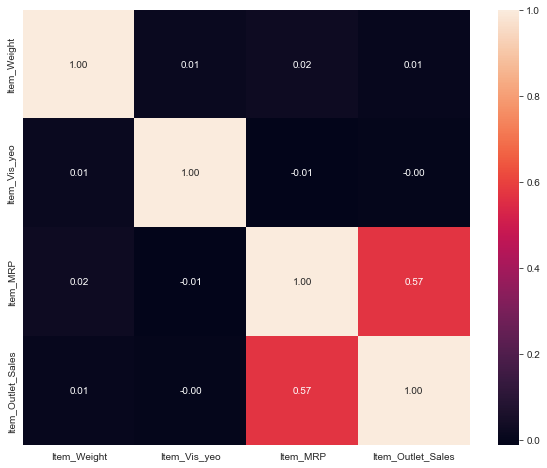

In [121]:
#Heatmap of numerical columns
plt.figure(figsize = (10, 8))
sns.heatmap(skew_removed_train[['Item_Weight', 'Item_Vis_yeo', 'Item_MRP', 'Item_Outlet_Sales']].corr(), annot=True, fmt = '.2f')
plt.show()

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
df = train4.drop('Item_Outlet_Sales', axis=True).select_dtypes(np.number)

vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,5.127860,Item_Weight
1,4.433006,Item_MRP
2,4.020483,Item_Vis_yeo


#### Observation:
All Numerical values are within 10 VIF. hence no multicollinearity.

<h1 align = "center"><font color = "magenta"><b>5. Encoding Categorical features.</b></font></h1>

### Item_Identifier

In [125]:
train5 = train4.copy()
test5 = test4.copy()

In [126]:
# Fetting making category of Item_Identifier based on initials
train5['Item_Identifier_type']= train5['Item_Identifier'].apply(lambda x: x[0:2])
test5['Item_Identifier_type']= test5['Item_Identifier'].apply(lambda x: x[0:2])

### Item_Fat_Content

In [127]:
#Converting fat content duplicacy to proper category
train5['Item_Fat_Content']=train5['Item_Fat_Content'].replace('LF','Low Fat')
train5['Item_Fat_Content']=train5['Item_Fat_Content'].replace('low fat','Low Fat')
train5['Item_Fat_Content']=train5['Item_Fat_Content'].replace('reg','Regular')


test5['Item_Fat_Content']=test5['Item_Fat_Content'].replace('LF','Low Fat')
test5['Item_Fat_Content']=test5['Item_Fat_Content'].replace('low fat','Low Fat')
test5['Item_Fat_Content']=test5['Item_Fat_Content'].replace('reg','Regular')

### Outlet_Size

In [128]:
# applying orderinal value to Outlet_Size based on the sales generation
outlet_size_dict = {'Small': 1, 'High': 2, 'Medium': 3}

train5['Outlet_Size'] = train5['Outlet_Size'].map(outlet_size_dict)
test5['Outlet_Size'] = test5['Outlet_Size'].map(outlet_size_dict)

### Outlet_Location_Type

In [129]:
# applying orderinal value to Outlet_Location_Type based on the sales generation
outlet_loc_dict = {'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3}

train5['Outlet_Location_Type'] = train5['Outlet_Location_Type'].map(outlet_loc_dict)
test5['Outlet_Location_Type'] = test5['Outlet_Location_Type'].map(outlet_loc_dict)

### Outlet_Type

In [130]:
# applying orderinal value to outlet_type based on the sales generation
outlet_type_dict = {'Grocery Store': 1, 'Supermarket Type2': 2, 'Supermarket Type1': 3, 'Supermarket Type3':4}


train5['Outlet_Type'] = train5['Outlet_Type'].map(outlet_type_dict)
test5['Outlet_Type'] = test5['Outlet_Type'].map(outlet_type_dict)

In [131]:
train6 = train5.copy()
test6 = test5.copy()

### dropping Item_Identifier colum

In [132]:
train6.drop('Item_Identifier', axis=1, inplace=True)
test6.drop('Item_Identifier', axis=1, inplace=True)

### using pd.get_dummies to encode rest of the categorical features

In [133]:
train7 = pd.get_dummies(train6, drop_first = True)
test7 = pd.get_dummies(test6, drop_first = True)

In [134]:
train7

,Item_Weight,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Vis_yeo,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Identifier_type_FD,Item_Identifier_type_NC
0,9.300,249.8092,3,1,3,3735.1380,0.014944,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,5.920,48.2692,3,3,2,443.4228,0.017702,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,17.500,141.6180,3,1,3,2097.2700,0.015559,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,19.200,182.0950,1,3,1,732.3800,0.044709,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,8.930,53.8614,2,3,3,994.7052,0.044709,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,214.5218,2,3,3,2778.3834,0.044709,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
8519,8.380,108.1570,1,2,3,549.2850,0.044709,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
8520,10.600,85.1224,1,2,3,1193.1136,0.044709,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
8521,7.210,103.1332,3,3,2,1845.5976,0.044709,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [135]:
test7

,Item_Weight,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Vis_yeo,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Identifier_type_FD,Item_Identifier_type_NC
0,20.750,107.8622,3,1,3,0.007316,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
1,8.300,87.3198,1,2,3,0.032599,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,14.600,241.7538,1,3,1,0.066732,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,7.315,155.0340,1,2,3,0.014384,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,13.600,234.2300,3,3,4,0.074296,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,141.3154,1,1,3,0.044862,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
5677,7.600,169.1448,3,3,2,0.044862,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5678,10.000,118.7440,1,2,3,0.044862,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
5679,15.300,214.6218,1,2,3,0.044862,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [136]:
train7.isna().sum().sum()

0

In [137]:
test7.isna().sum().sum()

0

# StandardScaler of the Data

In [138]:
X=train7.drop(columns =['Item_Outlet_Sales'])
Y=train7['Item_Outlet_Sales']
test_data = test7.copy()

In [139]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [140]:
X_train_scaled = scaler.fit_transform(X)
test_data_scaled = scaler.fit_transform(test_data)

<h1 align = "center"><font color = "red"><b> Model Selection </b></font></h1>

In [141]:
lr = LinearRegression()
ls = Lasso()
rd = Ridge()
rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()
xgb = XGBRegressor()

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Linear Regression model..
 
===scores for training set===
r2 score for training set 0.5578003778108738
MAE for training set:  796.8149533038422
MSE for training set:  1101029.5099807493
SMSE for training set:  1049.2995330127376
 
===scores for testing set===
r2 score for testing set :  0.5577949359801809
MAE for testing set:  794.6838922602385
MSE for testing set:  1111242.621101726
SMSE for testing set:  1054.1549322095525
 
 


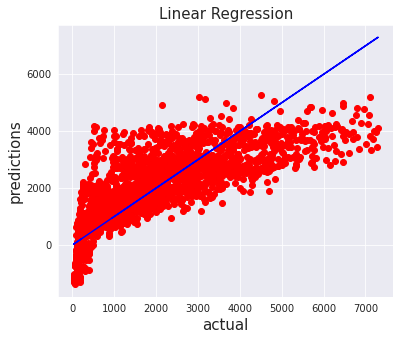

 
Cross Validation score at best cv=11 is : 55.44%
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Lasso model..
 
===scores for training set===
r2 score for training set 0.55795876723304
MAE for training set:  798.7071082479542
MSE for training set:  1100635.137351007
SMSE for training set:  1049.1115943268414
 
===scores for testing set===
r2 score for testing set :  0.5578986638845
MAE for testing set:  796.4087143887714
MSE for testing set:  1110981.9572657463
SMSE for testing set:  1054.0312885610874
 
 


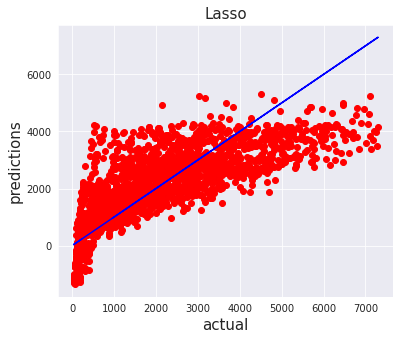

 
Cross Validation score at best cv=11 is : 55.48%
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Ridge model..
 
===scores for training set===
r2 score for training set 0.5578290359210423
MAE for training set:  789.5778632201183
MSE for training set:  1083974.7808884243
SMSE for training set:  1041.1410955717886
 
===scores for testing set===
r2 score for testing set :  0.5578106402466464
MAE for testing set:  818.4653168282805
MSE for testing set:  1161178.6206791177
SMSE for testing set:  1077.579983425415
 
 


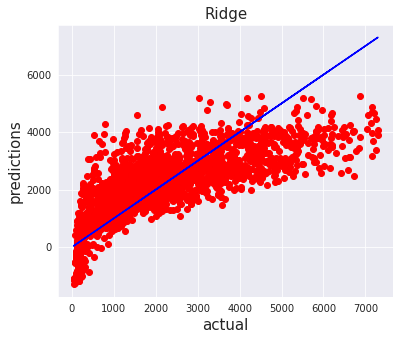

 
Cross Validation score at best cv=11 is : 55.44%
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Ada-Boost Regressor model..
 
===scores for training set===
r2 score for training set 0.565490186923637
MAE for training set:  788.4496667530785
MSE for training set:  1105211.708772935
SMSE for training set:  1051.2904968527657
 
===scores for testing set===
r2 score for testing set :  0.5679575857613154
MAE for testing set:  759.5889259848686
MSE for testing set:  1016314.911767253
SMSE for testing set:  1008.1244525192576
 
 


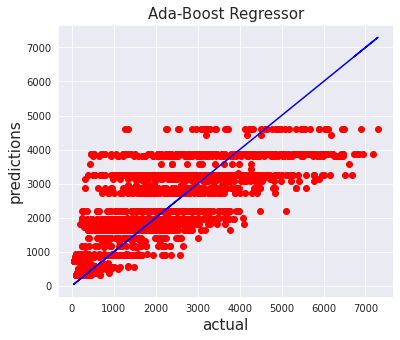

 
Cross Validation score at best cv=6 is : 55.97%
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Gradient Boosting Regressor model..
 
===scores for training set===
r2 score for training set 0.6158454767072084
MAE for training set:  709.9596668200937
MSE for training set:  958114.6905383295
SMSE for training set:  978.8333313380422
 
===scores for testing set===
r2 score for testing set :  0.6148443897011676
MAE for testing set:  705.8686234057391
MSE for testing set:  964487.8613934714
SMSE for testing set:  982.0834289374153
 
 


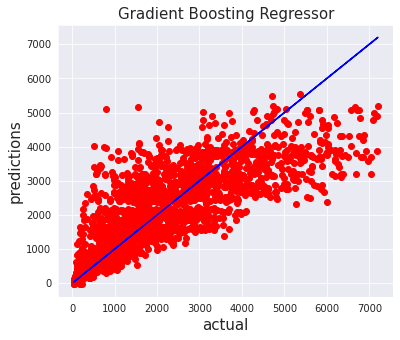

 
Cross Validation score at best cv=11 is : 58.67%
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Decision Tree Regressor model..
 
===scores for training set===
r2 score for training set 1.0
MAE for training set:  0.0
MSE for training set:  0.0
SMSE for training set:  0.0
 
===scores for testing set===
r2 score for testing set :  0.22133612128673585
MAE for testing set:  998.7654623501198
MSE for testing set:  1958482.8426261893
SMSE for testing set:  1399.458053185657
 
 


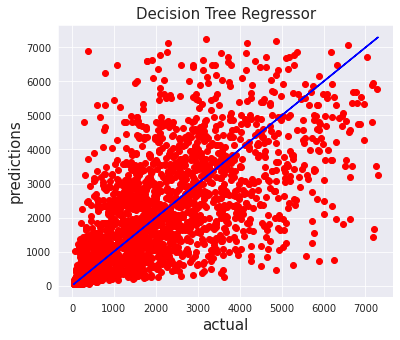

 
Cross Validation score at best cv=6 is : 17.77%
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for SVR model..
 
===scores for training set===
r2 score for training set 0.006180061045317875
MAE for training set:  1212.3020959216474
MSE for training set:  2472161.511241018
SMSE for training set:  1572.3108825041625
 
===scores for testing set===
r2 score for testing set :  0.006196316851791672
MAE for testing set:  1226.3552769951548
MSE for testing set:  2508175.0053604944
SMSE for testing set:  1583.7218838421393
 
 


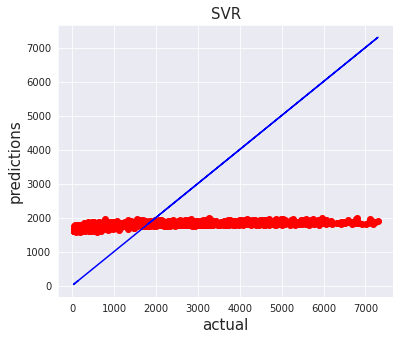

 
Cross Validation score at best cv=6 is : 0.74%
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for KNeighbors Regressor model..
 
===scores for training set===
r2 score for training set 0.619992011643594
MAE for training set:  718.251006345754
MSE for training set:  947772.8728673363
SMSE for training set:  973.5362719833998
 
===scores for testing set===
r2 score for testing set :  0.47013915329875355
MAE for testing set:  843.647601880096
MSE for testing set:  1326851.6443899462
SMSE for testing set:  1151.8904654479722
 
 


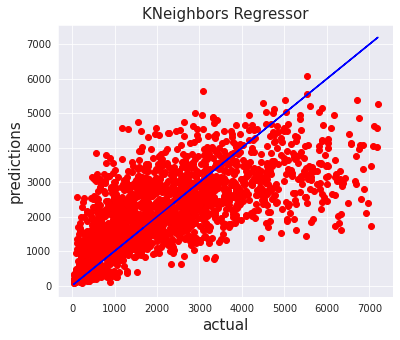

 
Cross Validation score at best cv=12 is : 44.68%
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for XGB Regressor model..
 
===scores for training set===
r2 score for training set 0.850799840734729
MAE for training set:  439.608983621636
MSE for training set:  369647.5763208027
SMSE for training set:  607.9864935348504
 
===scores for testing set===
r2 score for testing set :  0.5582205494433752
MAE for testing set:  765.4010926759264
MSE for testing set:  1128215.381018598
SMSE for testing set:  1062.1748354289882
 
 


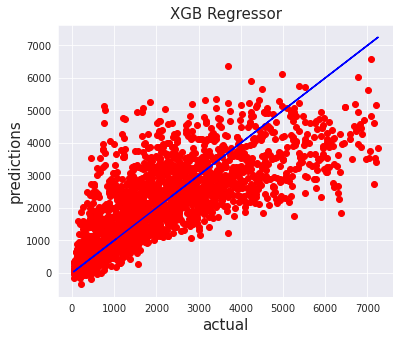

 
Cross Validation score at best cv=11 is : 53.38%


,algo,train_r2score,test_r2score,train_mae,train_mse,train_srmse,test_mae,test_mse,test_srmse,cross_val_score
Sr. No.,,,,,,,,,,
5,Gradient Boosting Regressor,0.62,0.61,709.96,958114.69,978.83,705.87,964487.86,982.08,0.59
4,Ada-Boost Regressor,0.57,0.57,788.45,1105211.71,1051.29,759.59,1016314.91,1008.12,0.56
9,XGB Regressor,0.85,0.56,439.61,369647.58,607.99,765.40,1128215.38,1062.17,0.53
1,Linear Regression,0.56,0.56,796.81,1101029.51,1049.30,794.68,1111242.62,1054.15,0.55
2,Lasso,0.56,0.56,798.71,1100635.14,1049.11,796.41,1110981.96,1054.03,0.55
3,Ridge,0.56,0.56,789.58,1083974.78,1041.14,818.47,1161178.62,1077.58,0.55
8,KNeighbors Regressor,0.62,0.47,718.25,947772.87,973.54,843.65,1326851.64,1151.89,0.45
6,Decision Tree Regressor,1.00,0.22,0.00,0.00,0.00,998.77,1958482.84,1399.46,0.18
7,SVR,0.01,0.01,1212.30,2472161.51,1572.31,1226.36,2508175.01,1583.72,0.01


In [180]:
algo = [] #list to save ML algorithm name

#lists to store evaluation metrics data for train set
train_r2score = [] 
train_mae = []
train_mse = []
train_srmse = []


#lists to store evaluation metrics data for test set
test_r2score = []
test_mae = []
test_mse = []
test_srmse = []

crossvalscore = []


models = [lr, ls, rd, abr, gbr, dt, svr, knn, xgb]
models_name = ['Linear Regression', 'Lasso', 'Ridge',
               'Ada-Boost Regressor', 'Gradient Boosting Regressor',
               'Decision Tree Regressor', 'SVR', 'KNeighbors Regressor', 'XGB Regressor']
dummy_count = 0 #dummy variable for count purpose
for model in models:
    diff = []
    randomstate = []
    for i in range(0, 100):  ### loop to find best random state for splitting
        x_train, x_test, y_train, y_test = train_test_split(X_train_scaled, Y, test_size = 0.25, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        diff.append(abs(r2_score(y_train, pred_train) - r2_score(y_test, pred_test)))
        randomstate.append(i)
        
    best_i = randomstate[diff.index(min(diff))]
    
    ### splitting the train7 set with best random state
    x_train, x_test, y_train, y_test = train_test_split(X_train_scaled, Y, random_state=best_i, test_size=.25)
    
    
    ### straining the model
    model.fit(x_train, y_train)
    algo.append(models_name[dummy_count])
    pred_test = model.predict(x_test)
    pred_train = model.predict(x_train)
    
     ### storing metrics into respective lists
    train_r2score.append(round(r2_score(y_train, pred_train),2))
    train_mae.append(round(mean_absolute_error(y_train, pred_train),2))
    train_mse.append(round(mean_squared_error(y_train, pred_train),2))
    train_srmse.append(round(np.sqrt(mean_squared_error(y_train, pred_train)),2))
    
    
    test_r2score.append(round(r2_score(y_test, pred_test),2))
    test_mae.append(round(mean_absolute_error(y_test, pred_test),2))
    test_mse.append(round(mean_squared_error(y_test, pred_test),2))
    test_srmse.append(round(float(np.sqrt(mean_squared_error(y_test, pred_test))),2))
    
    
    ##showing the results in output
    print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
    print(' ')
    print(' ')
    print('for '+ models_name[dummy_count] + ' model..')
    print(' ')
    print('===scores for training set===')
    print('r2 score for training set', r2_score(y_train, pred_train))
    print('MAE for training set: ', mean_absolute_error(y_train, pred_train))
    print('MSE for training set: ', mean_squared_error(y_train, pred_train))
    print('SMSE for training set: ', np.sqrt(mean_squared_error(y_train, pred_train)))
    print(' ')
    print('===scores for testing set===')
    print('r2 score for testing set : ', r2_score(y_test, pred_test))
    print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
    print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
    print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))
    print(' ')
    print(' ')
    
    
    ##plotting the graph with bestfit line, actual & predicted values
    plt.figure(figsize = (6,5))
    plt.scatter(x = y_test, y=pred_test, color = 'r')
    plt.plot(y_test, y_test, color = 'b')
    plt.xlabel('actual', fontsize = 15)
    plt.ylabel('predictions', fontsize = 15)
    plt.title(models_name[dummy_count], fontsize = 15)
    plt.show()
    
    print(' ')
    
    test_accuracy = r2_score(y_test, pred_test)
    cv_diff = []
    best_cv = []
    
    ### loop to find best CV fold value
    for j in range(4,13):
        cv_score = cross_val_score(model, X_train_scaled, Y, cv = j)
        cv_mean = cv_score.mean()
        cv_diff.append(abs(cv_mean - test_accuracy))
        best_cv.append(j)
    
    
    ### printing CV Score based on best CV fold value
    k_f = best_cv[cv_diff.index(min(cv_diff))]
    cv_score = cross_val_score(model, X_train_scaled, Y, cv=k_f).mean()
    crossvalscore.append(round(cv_score,2))
    print(f"Cross Validation score at best cv={k_f} is : {cv_score*100:.2f}%")          
    dummy_count+=1

### dataframe to make list of all the ML algorithms & their evaluation metrics
table = pd.DataFrame(list(zip(algo, train_r2score, test_r2score, train_mae, train_mse,
                              train_srmse, test_mae, test_mse, test_srmse, crossvalscore)),
                              columns =['algo', 'train_r2score', 'test_r2score', 'train_mae','train_mse',
                                       'train_srmse', 'test_mae', 'test_mse', 'test_srmse', 'cross_val_score'],
                              index=pd.RangeIndex(start=1, stop=(len(algo)+1), name='Sr. No.'))


### display dataframe & sort based on TEST MAE score.
table.sort_values(by=['test_mae', 'test_r2score', 'cross_val_score', 'test_srmse', 'test_mse' ])

#### Observation
We will select Gradient Boosting Regressor model as it has,
1. minimum MAE value on test set, also the train set performed same. & highest cross val score.
2. Cross_Val_Score is sam as test set score & train set score.
3. train score & test score are almost similar.

<h1 align = "center"><font color = "red"><b> Hyper paramter tuning using GridSearchCV </b></font></h1>

In [162]:
param_grid  = {'loss':['ls', 'lad'],
               'max_features' : ['auto', 'sqrt', 'log2'],
               'criterion':['friedman_mse', 'squared_error', 'mae'],
               'n_estimators':[100, 150, 200, 300],
              }

In [155]:
gbr_hpt = GradientBoostingRegressor(alpha = 0.9)

In [149]:
diff2 = []
ran =[]

for i in range(0, 100):
        x_train, x_test, y_train, y_test = train_test_split(X_train_scaled, Y, test_size = 0.25, random_state = i)
        gbr_hpt.fit(x_train, y_train)
        pred_train = gbr_hpt.predict(x_train)
        pred_test = gbr_hpt.predict(x_test)
        diff2.append(abs(r2_score(y_train, pred_train) - r2_score(y_test, pred_test)))
        ran.append(i)
        
best_i = ran[diff2.index(min(diff2))]
best_i

9

In [156]:
x_train, x_test, y_train, y_test = train_test_split(X_train_scaled, Y, test_size = 0.25, random_state = 9)

<h1 align = "center"><font color = "red"> Because of the heavy size of the data.. the machine/laptop taking too much time & also crashed 3 times. i have 6core processor, but still this gridsearch takes more than 2 hrs & system crashes. i cancelled/interrupted the grid search & run the programme with default parameters in GradientBoostingRegressor... due to deadline of submission.</font></h1>

In [163]:
grid=GridSearchCV(estimator = gbr_hpt, param_grid = param_grid, cv=3,  n_jobs = 1)
grid.fit(x_train,y_train)
grid.best_params_

KeyboardInterrupt: 

===scores for testing set===
r2 score for testing set :  0.6148323533828746
MAE for testing set:  706.0989043657979
MSE for testing set:  964518.0021536708
SMSE for testing set:  982.0987741330658


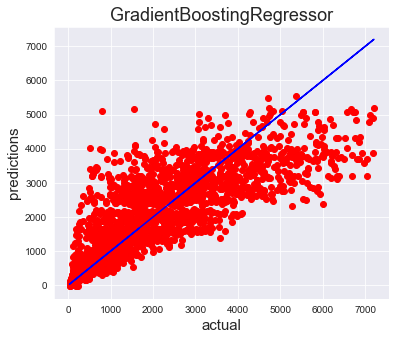

In [164]:
gbr_final = GradientBoostingRegressor()
gbr_final.fit(x_train, y_train)

pred_test = gbr_final.predict(x_test)


print('===scores for testing set===')
print('r2 score for testing set : ', r2_score(y_test, pred_test))
print('MAE for testing set: ', mean_absolute_error(y_test, pred_test))
print('MSE for testing set: ', mean_squared_error(y_test, pred_test))
print('SMSE for testing set: ', np.sqrt(mean_squared_error(y_test, pred_test)))


plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=pred_test, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('GradientBoostingRegressor', fontsize = 18)
plt.show()

In [166]:
cross_val_score(gbr_final, X_train_scaled, Y, cv = 11, scoring ='r2').mean()

0.5865355205113146

<h1 align="center"><font color = "red">Model Saving</font> </h1>

In [169]:
filename='bigmsrt.pkl'
pickle.dump(gbr_final,open(filename,'wb'))

## Predicting on the TEST DATA PROVIDED.

In [170]:
gbr_model =pickle.load(open('bigmsrt.pkl','rb'))
y_pred =gbr_model.predict(test_data_scaled)
y_pred

array([1317.92097904, 1442.95466168,  733.89665603, ..., 1746.89723528,
       3576.18079517, 1213.91067766])